In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# 设定目录路径
dir_path = "H_Env_Base_Pen_Env9_TS1000"

# 获取目录中所有的.npy文件
file_names = [f for f in os.listdir(dir_path) if f.endswith('_reward_logs.npy') and f.split('_')[0].isdigit()]

In [3]:
file_names

['0_reward_logs.npy',
 '1_reward_logs.npy',
 '2_reward_logs.npy',
 '3_reward_logs.npy']

In [4]:
# 设定目录路径
# dir_path = "H_Env_Base_Pen"

# 获取目录中所有的.npy文件
file_names = [f for f in os.listdir(dir_path) if f.endswith('_reward_logs.npy') and f.split('_')[0].isdigit()]

# 按文件名中的数字排序
file_names.sort(key=lambda x: int(x.split('_')[0]))

# 读取每个文件中的数据
rewards = []
for file_name in file_names:
    file_path = os.path.join(dir_path, file_name)
    reward_data = np.load(file_path)
    rewards.append(reward_data)



In [5]:
len(rewards)

4

In [6]:
rewards[0].shape

(30, 9)

In [7]:
# save_dir = "Res_H_Env_Pen"
# file_name = f"FMRL_Baseline_EnsNumEachClient=3.npy"
# np.save(os.path.join(save_dir, file_name), rewards)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_all_experiments(rewards, plot_individual_envs=False):
    num_experiments = len(rewards)
    num_rounds, num_envs = rewards[0].shape

    all_rewards = np.array(rewards)
    
    # 计算每个环境的均值和方差
    mean_rewards = np.mean(all_rewards, axis=0)
    std_rewards = np.std(all_rewards, axis=0)
    
    # 计算所有环境的均值和方差
    avg_mean_rewards = np.mean(mean_rewards, axis=1)
    avg_std_rewards = np.std(mean_rewards, axis=1)

    # 打印每个环境的最终奖励值和方差
    print("Final rewards and standard deviations for each environment:")
    for env in range(num_envs):
        final_mean_reward = mean_rewards[-1, env]
        final_std_reward = std_rewards[-1, env]
        print(f"Environment {env + 1} - Final Mean Reward: {final_mean_reward:.2f}, Final Std Dev: {final_std_reward:.2f}")

    # 打印所有环境的最终奖励值和方差
    final_avg_mean_reward = avg_mean_rewards[-1]
    final_avg_std_reward = avg_std_rewards[-1]
    print(f"All Environments - Final Average Mean Reward: {final_avg_mean_reward:.2f}, Final Std Dev: {final_avg_std_reward:.2f}")

    if plot_individual_envs:
        for env in range(num_envs):
            plt.figure(figsize=(12, 8), dpi=100)
            plt.plot(mean_rewards[:, env], label=f'Environment {env + 1}', linewidth=2)
            plt.fill_between(range(num_rounds), mean_rewards[:, env] - std_rewards[:, env], mean_rewards[:, env] + std_rewards[:, env], alpha=0.2)
            
            plt.xlabel('Rounds', fontsize=14)
            plt.ylabel('Reward', fontsize=14)
            plt.title(f'Mean Rewards for Environment {env + 1}', fontsize=16)
            plt.legend(fontsize=12)
            plt.grid(True)  # 添加网格线
            plt.show()
        
        # 绘制平均值的图
        plt.figure(figsize=(12, 8), dpi=100)
        plt.plot(avg_mean_rewards, label='Average', linestyle='--', color='black', linewidth=2)
        plt.fill_between(range(num_rounds), avg_mean_rewards - avg_std_rewards, avg_mean_rewards + avg_std_rewards, color='black', alpha=0.2)
        
        plt.xlabel('Rounds', fontsize=14)
        plt.ylabel('Reward', fontsize=14)
        plt.title('Mean Rewards Across All Experiments', fontsize=16)
        plt.legend(fontsize=12)
        plt.grid(True)  # 添加网格线
        plt.show()

    # 绘制所有环境的均值和方差
    plt.figure(figsize=(12, 8), dpi=100)
    for env in range(num_envs):
        plt.plot(mean_rewards[:, env], label=f'Environment {env + 1}', linewidth=2)
        plt.fill_between(range(num_rounds), mean_rewards[:, env] - std_rewards[:, env], mean_rewards[:, env] + std_rewards[:, env], alpha=0.2)
    
    plt.plot(avg_mean_rewards, label='Average', linestyle='--', color='black', linewidth=2)
    plt.fill_between(range(num_rounds), avg_mean_rewards - avg_std_rewards, avg_mean_rewards + avg_std_rewards, color='black', alpha=0.2)

    plt.xlabel('Rounds', fontsize=14)
    plt.ylabel('Reward', fontsize=14)
    plt.title('Mean Rewards Across All Experiments', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)  # 添加网格线
    plt.show()


Final rewards and standard deviations for each environment:
Environment 1 - Final Mean Reward: -422.35, Final Std Dev: 178.21
Environment 2 - Final Mean Reward: -383.16, Final Std Dev: 117.54
Environment 3 - Final Mean Reward: -354.88, Final Std Dev: 145.85
Environment 4 - Final Mean Reward: -163.10, Final Std Dev: 1.30
Environment 5 - Final Mean Reward: -146.58, Final Std Dev: 22.12
Environment 6 - Final Mean Reward: -163.13, Final Std Dev: 25.14
Environment 7 - Final Mean Reward: -286.65, Final Std Dev: 88.21
Environment 8 - Final Mean Reward: -257.57, Final Std Dev: 54.55
Environment 9 - Final Mean Reward: -253.49, Final Std Dev: 65.00
All Environments - Final Average Mean Reward: -270.10, Final Std Dev: 95.46


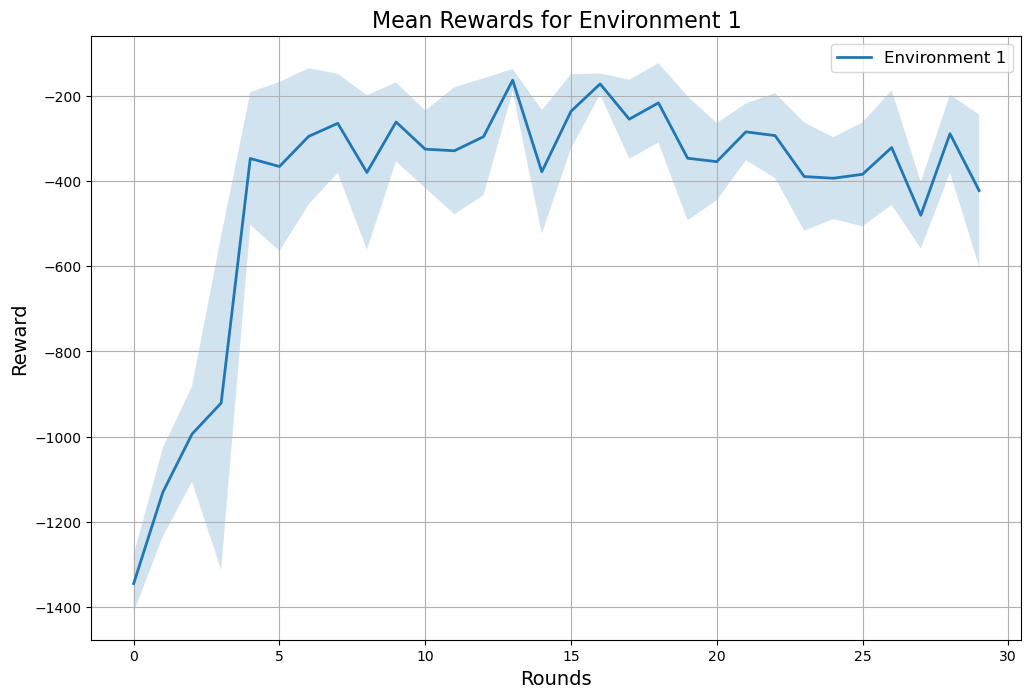

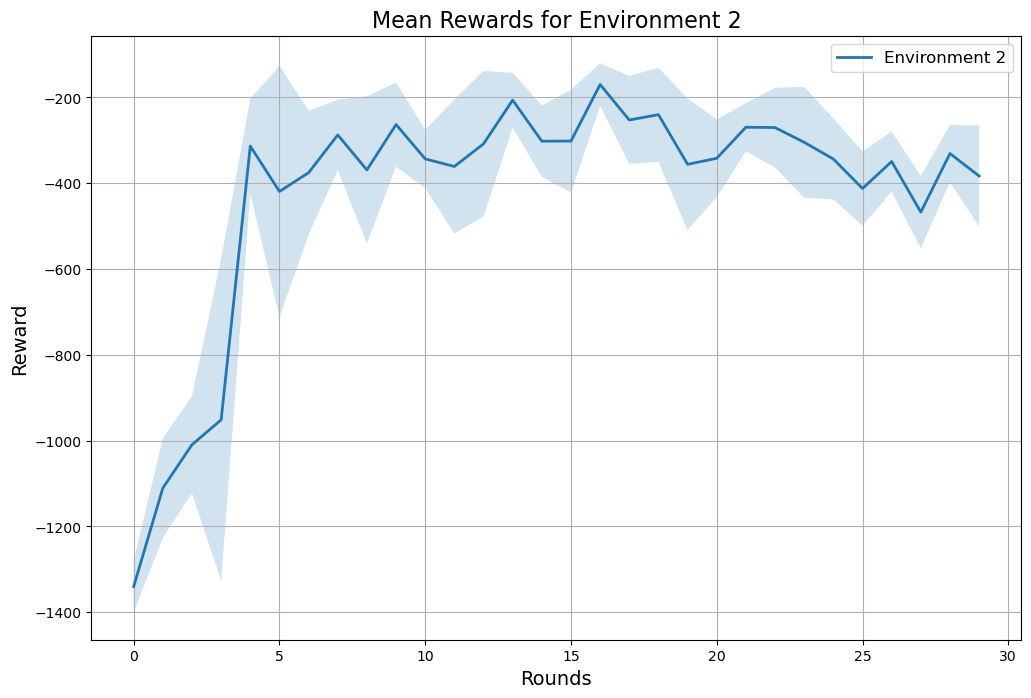

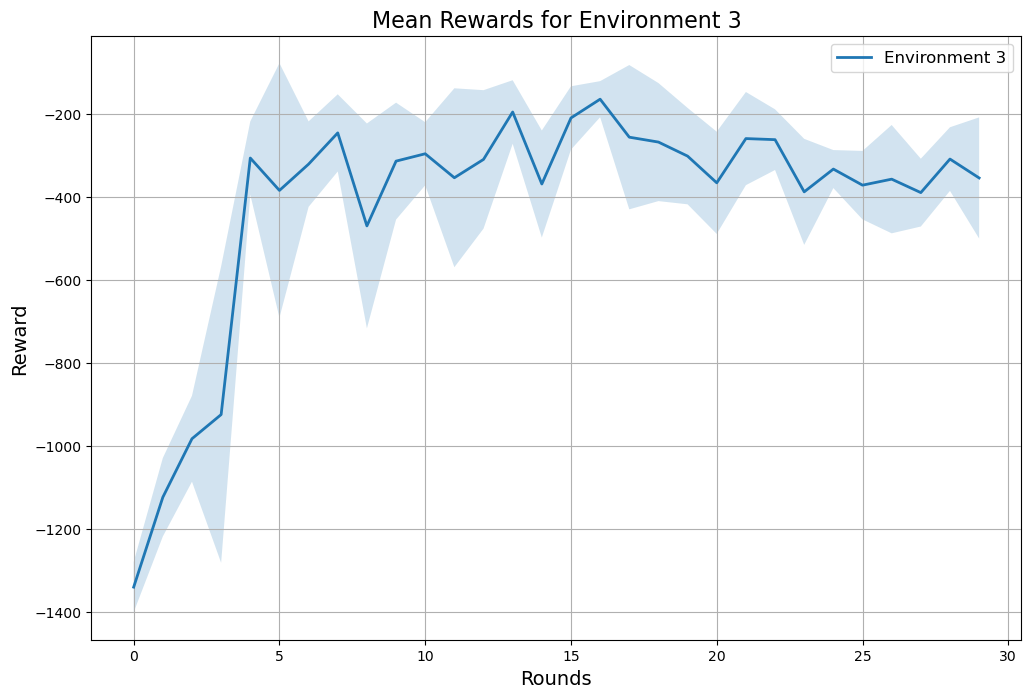

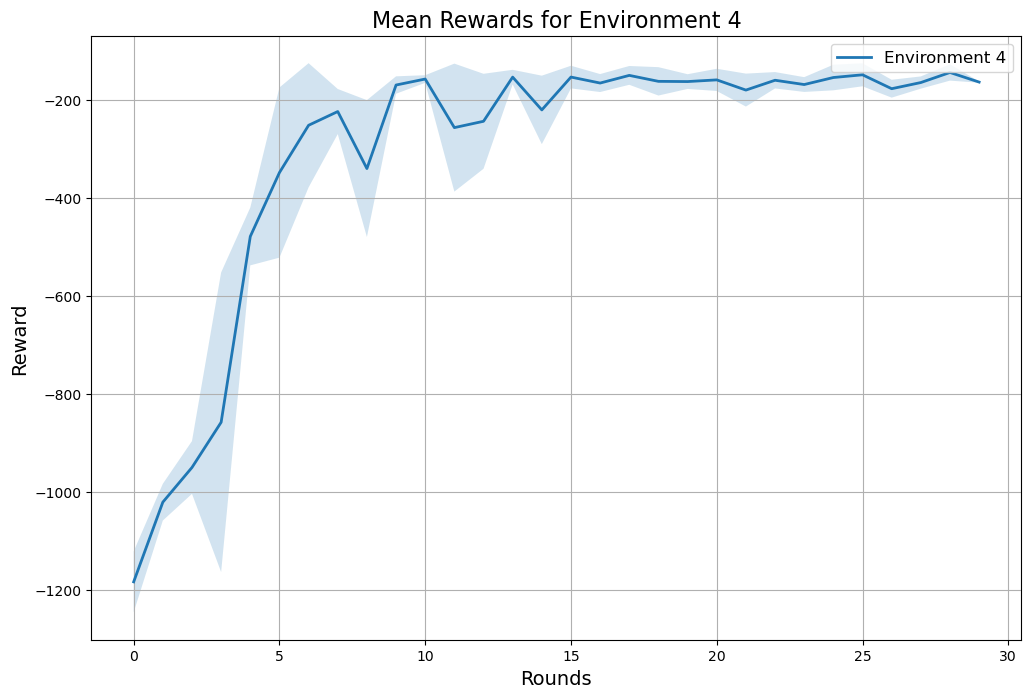

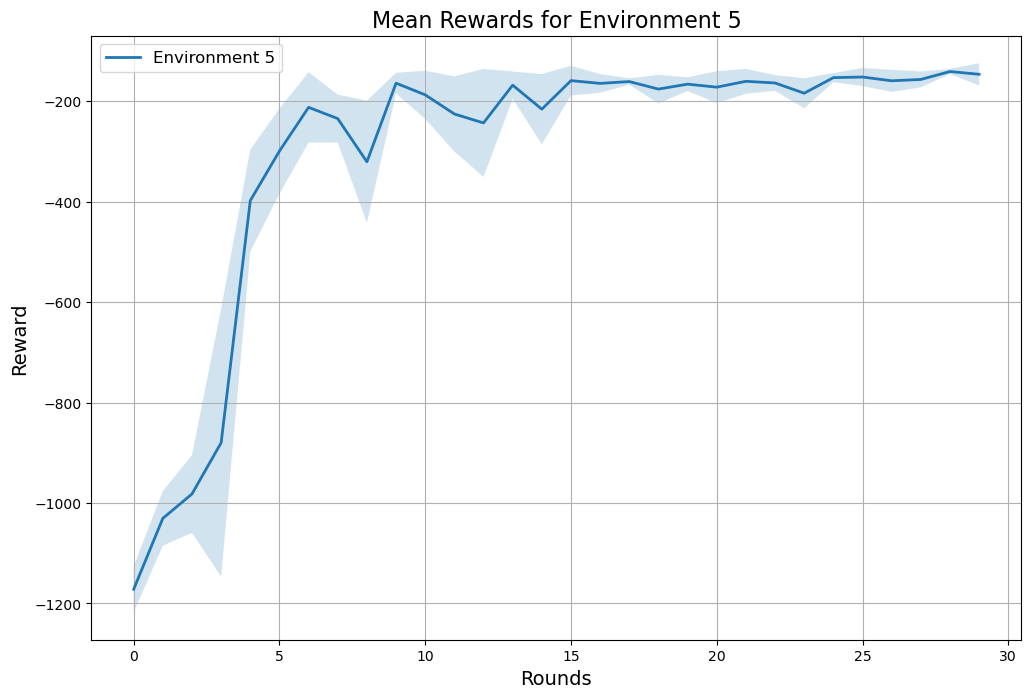

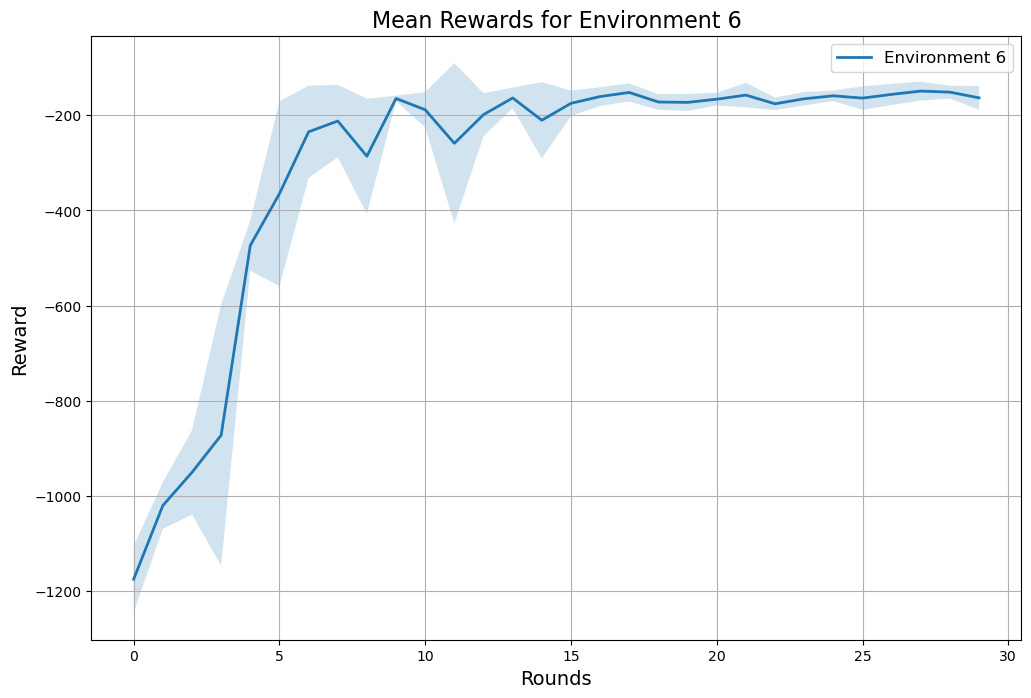

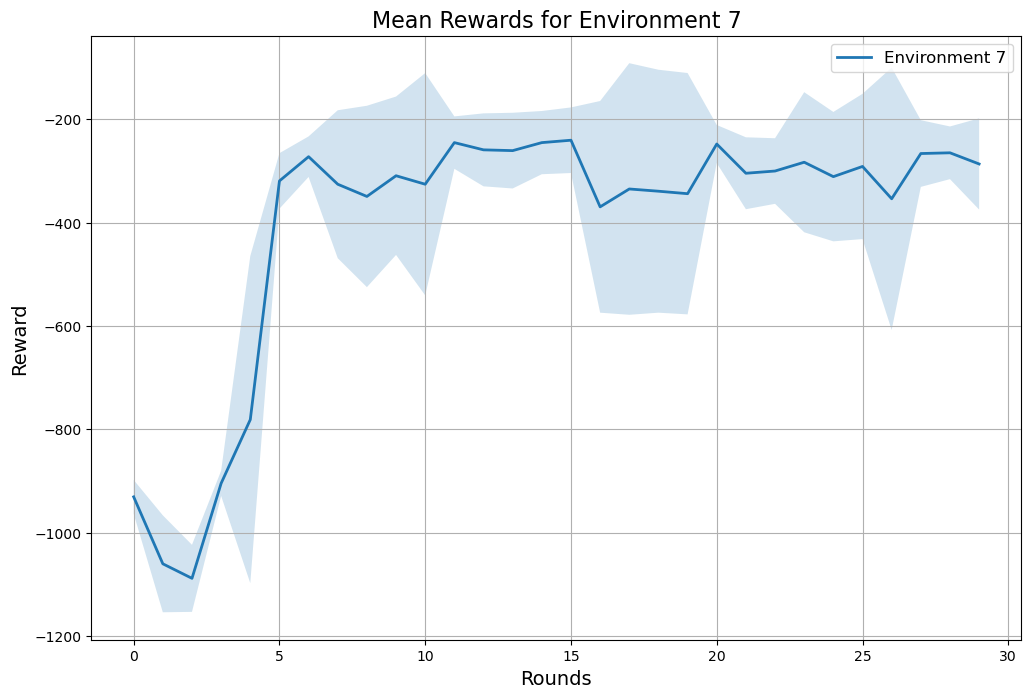

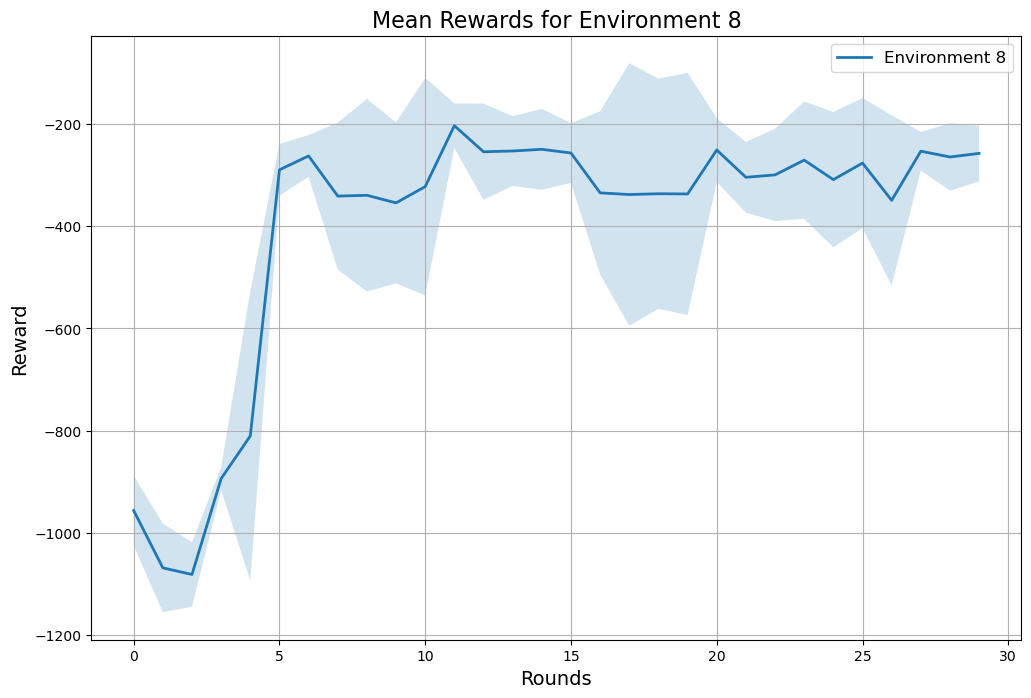

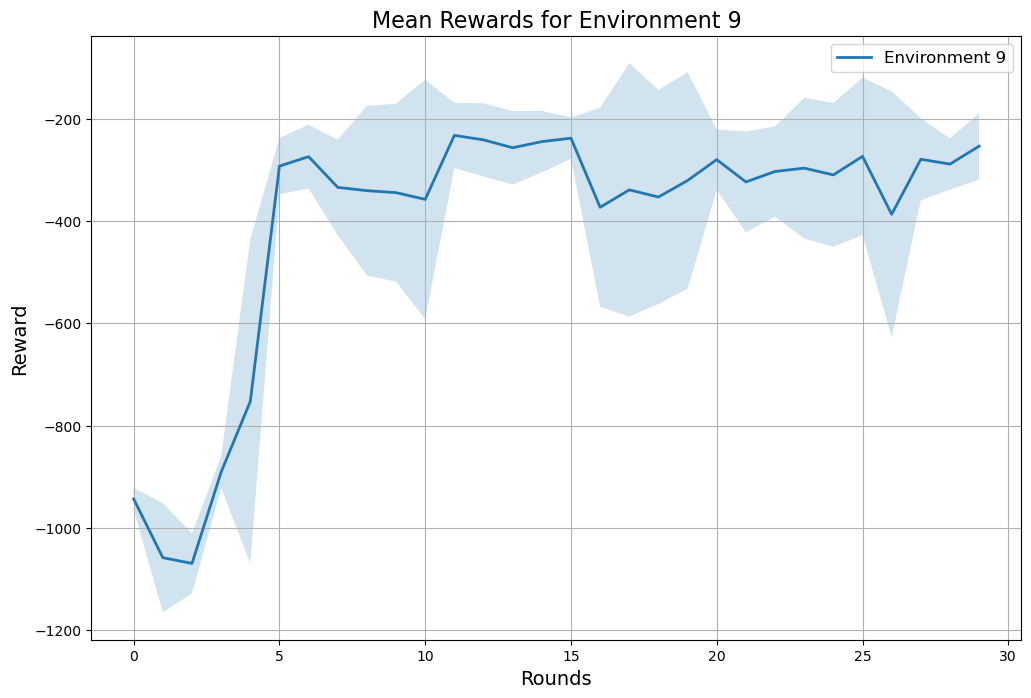

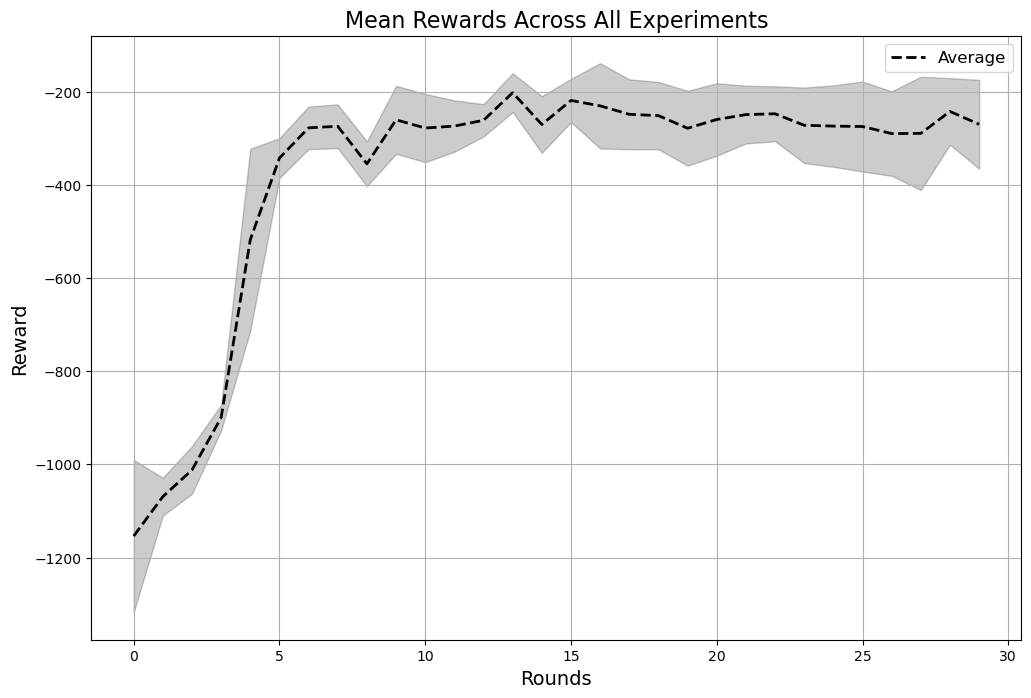

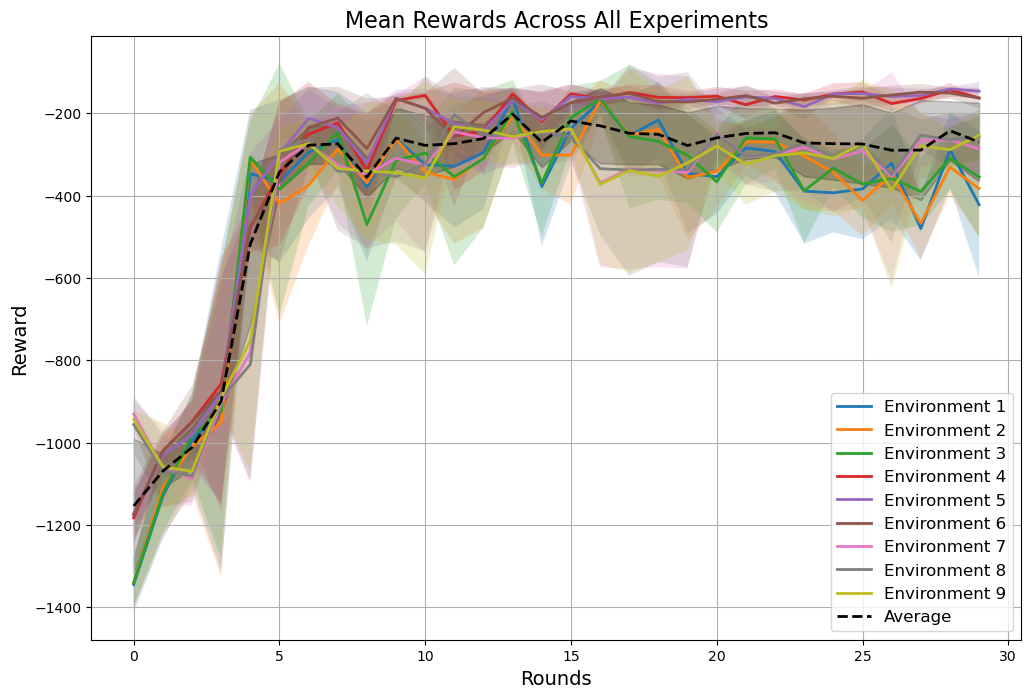

In [9]:
# 绘制所有实验的结果，设置plot_individual_envs=True以单独绘制每个环境的图
plot_all_experiments(rewards, plot_individual_envs=True)

In [10]:
env_avg_rewards = []
for expId in range(len(rewards)):
    print(expId)
    env_avg_rewards.append(np.mean(rewards[expId], axis=1))

0
1
2
3


In [11]:
env_avg_rewards

[array([-1190.27559968, -1115.87870064, -1105.48917446, -1030.58417223,
         -492.72839492,  -535.87266449,  -280.54287412,  -244.55015751,
         -464.63067672,  -196.66067952,  -285.33839211,  -258.86038747,
         -271.45628692,  -164.38328212,  -191.39991236,  -245.15027011,
         -238.61265959,  -259.25629449,  -265.37412064,  -298.2518918 ,
         -227.70266815,  -247.53528262,  -242.26322924,  -187.67826342,
         -269.52780325,  -220.08948418,  -227.01082123,  -272.71331826,
         -217.2147397 ,  -204.06528491]),
 array([-1166.80983808, -1034.21392764,  -977.32143129, -1010.84308517,
         -566.46097658,  -238.08854989,  -243.24771269,  -243.76850804,
         -353.60053974,  -387.42948304,  -250.72324455,  -219.18532881,
         -201.09783474,  -241.89580499,  -297.6388877 ,  -191.27018555,
         -184.36202844,  -190.7244324 ,  -226.40907533,  -241.62829158,
         -254.12306287,  -260.46656179,  -233.56653927,  -268.18077395,
         -244.36400134

In [12]:
save_dir = "Res_H_Env_Pen"
file_name = f"EnvAvg_FMRL_Baseline_EnsNumEachClient=3.npy"
np.save(os.path.join(save_dir, file_name), env_avg_rewards)

In [14]:
env_avg_rewards = np.load("Res_H_Env_Pen/EnvAvg_FMRL_Baseline_EnsNumEachClient=3.npy")

In [16]:
env_avg_rewards.shape

(5, 30)

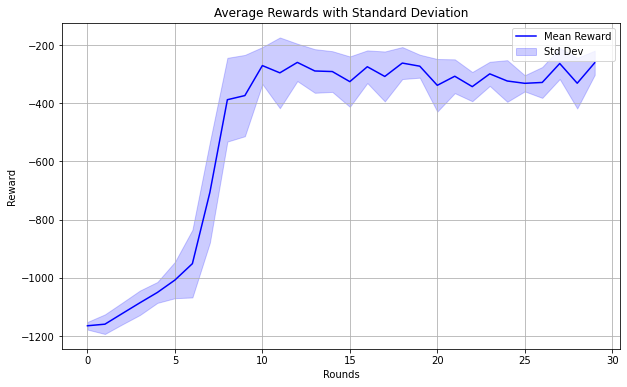

In [17]:
# 计算均值和方差
mean_rewards = np.mean(env_avg_rewards, axis=0)
std_rewards = np.std(env_avg_rewards, axis=0)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(mean_rewards, label='Mean Reward', color='b')

# 添加方差阴影
plt.fill_between(range(len(mean_rewards)), 
                 mean_rewards - std_rewards, 
                 mean_rewards + std_rewards, 
                 color='b', alpha=0.2, label='Std Dev')

# 添加图例和标签
plt.xlabel('Rounds')
plt.ylabel('Reward')
plt.title('Average Rewards with Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()